In [1]:
import argparse
import base64
import io
import logging
from typing import Dict

import json

# pip install kfserving==0.3.0 -> dockerfile
#import kfserving
# pip install numpy -> dockerfile
import numpy as np

# pip install opencv-python -> dockerfile
from PIL import Image
from PIL import ImageFilter

# for MobileNet Prediction Parsing
from tensorflow.keras.applications.mobilenet import decode_predictions
import tensorflow as tf

In [2]:
import cv2


In [8]:
!wget Downloading data from https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json

--2020-06-10 15:50:25--  http://downloading/
Resolving downloading (downloading)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘downloading’
--2020-06-10 15:50:26--  http://data/
Resolving data (data)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘data’
--2020-06-10 15:50:27--  http://from/
Resolving from (from)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘from’
--2020-06-10 15:50:28--  https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.175.240
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.175.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/json]
Saving to: ‘imagenet_class_index.json’

imagenet_class_inde 100%[===================>]  34.53K  39.7KB/s    in 0.9s   

In [9]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json


--2020-06-10 15:50:59--  https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.175.240
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.175.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/json]
Saving to: ‘imagenet_class_index.json.1’

imagenet_class_inde 100%[===================>]  34.53K  82.9KB/s    in 0.4s    

2020-06-10 15:50:59 (82.9 KB/s) - ‘imagenet_class_index.json.1’ saved [35363/35363]



In [3]:
decode

NameError: name 'decode_prdictions' is not defined

In [2]:
def image_transform(instance):
    img = base64.b64decode(instance['image']['b64'])
    img = Image.open(io.BytesIO(img))
    # complexing code
    img = img.rotate(90).rotate(90).rotate(90).rotate(90)
    img = img.transpose(Image.FLIP_TOP_BOTTOM).transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_LEFT_RIGHT)
    # 블러처리
    img = img.filter(ImageFilter.BLUR)
    # 엠보싱
    img = img.filter(ImageFilter.EMBOSS)
    # 윤곽선 변환
    img = img.filter(ImageFilter.CONTOUR)
    # 자세히
    img = img.filter(ImageFilter.DETAIL)
    # 날카롭게
    img = img.filter(ImageFilter.EDGE_ENHANCE)
    # 부드럽게
    img = img.filter(ImageFilter.SMOOTH)
    
    
    img = img.resize((224, 224))
    img = np.array(img)
    img = img/255
    img = img.reshape(-1, 224, 224, 3)
    logging.info(img)
    return img.tolist()

# postprocess will parse the prediction and get class name, accuracy

def parsing_prediction(prediction):
    label = decode_predictions(np.asarray([prediction]))
    label = label[0][0]
    output = [label[1], str(round(label[2]*100, 2))+'%']
    return output

In [3]:
with open('./cat.jpg', mode='rb') as file:
    img = file.read()
string = base64.encodebytes(img).decode("utf-8")
res = {'instances':[{'image': {'b64' : string}}]}

In [9]:
img = cv2.imread('./cat.jpg', cv2.IMREAD_GRAYSCALE)


In [11]:
img.shape

(414, 500)

In [12]:
img2 = Image.open('./cat.jpg')

In [14]:
img2 = np.array(img2)

In [15]:
img2.shape

(414, 500, 3)

In [17]:
def preprocess(inputs: Dict) -> Dict:
        return {'instances': [image_transform(instance) for instance in inputs['instances']][0]}

In [18]:
out = preprocess(res)

In [27]:
img = base64.b64decode(res['instances'][0]['image']['b64'])
img = Image.open(io.BytesIO(img))
# complexing code
img = img.rotate(90).rotate(90).rotate(90).rotate(90)
img = img.transpose(Image.FLIP_TOP_BOTTOM).transpose(Image.FLIP_TOP_BOTTOM)
img = img.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_LEFT_RIGHT)
# 블러처리
img = img.filter(ImageFilter.BLUR)
# 엠보싱
img = img.filter(ImageFilter.EMBOSS)
# 윤곽선 변환
img = img.filter(ImageFilter.CONTOUR)
# 자세히
img = img.filter(ImageFilter.DETAIL)
# 날카롭게
img = img.filter(ImageFilter.EDGE_ENHANCE)
# 부드럽게
img = img.filter(ImageFilter.SMOOTH)

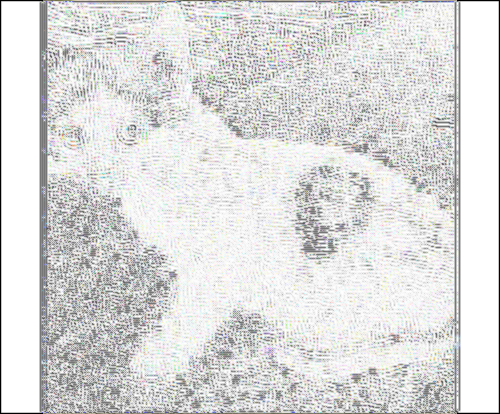

In [28]:
img

In [42]:
prediction ={
"predictions": [[3.1743964e-06, 7.69828785e-06, 7.258197e-06, 4.5665688e-06, 0.000220631613, 0.000286126218, 0.000141292927, 3.73443108e-05, 0.000137147741, 1.47333485e-05, 1.55194115e-07, 4.10349867e-06, 8.28426039e-08, 2.33899399e-07, 7.54911241e-07, 2.58727027e-07, 1.94842119e-06, 3.16619262e-05, 1.78145892e-05, 1.22505389e-05, 7.96538373e-08, 1.83763245e-06, 2.7108544e-07, 4.57265e-05, 4.55736057e-07, 1.0673611e-07, 1.44561938e-07, 6.89973604e-07, 2.36535826e-07, 8.69694668e-06, 1.62783635e-06, 6.43962665e-07, 5.29847682e-07, 8.50895776e-06, 8.41654e-06, 9.42761176e-07, 3.49552784e-06, 1.98963949e-06, 1.33575156e-06, 2.86025693e-06, 2.73223191e-06, 4.51789265e-06, 2.59278352e-07, 3.26280286e-07, 4.99276666e-07, 2.77138088e-06, 8.55241e-06, 4.30792682e-07, 3.51807e-07, 4.81256336e-07, 5.10210384e-07, 4.5445463e-06, 2.69841967e-05, 3.37973324e-06, 1.72199543e-05, 1.12352309e-05, 3.13177839e-06, 6.28668977e-06, 3.10952491e-05, 6.99692828e-06, 0.000106680549, 3.9464353e-06, 3.39845201e-07, 3.908292e-06, 6.25429038e-06, 5.9156886e-05, 1.01716587e-05, 1.97359486e-06, 3.36882749e-06, 2.17735123e-06, 1.08698714e-06, 4.90081129e-06, 4.24041264e-06, 3.63350546e-06, 1.2614365e-05, 1.3718618e-05, 2.01801067e-05, 3.77429728e-06, 3.51737253e-05, 4.40566646e-06, 2.44280386e-07, 6.69679457e-06, 1.49352672e-05, 7.30562124e-06, 0.000727062928, 7.73339852e-05, 3.00751958e-06, 9.45675083e-07, 6.21728532e-07, 9.85038332e-06, 8.93625725e-07, 1.3554704e-07, 4.99261432e-07, 3.2497494e-06, 7.48417392e-07, 6.43078351e-07, 5.69237818e-05, 6.13343e-05, 2.37255267e-06, 6.31514e-05, 5.23057633e-06, 1.86675599e-08, 3.6225581e-06, 6.14235e-07, 0.000869851036, 4.88697333e-06, 4.91343526e-05, 1.67737653e-05, 4.75842389e-05, 2.92612203e-05, 3.35901277e-05, 6.41540169e-07, 7.72158601e-05, 2.77218605e-05, 2.16914268e-05, 2.2391132e-05, 1.07362575e-06, 5.45335661e-06, 0.000124775092, 4.13968792e-06, 2.97884048e-06, 2.66528859e-05, 4.25077e-06, 3.52245638e-06, 2.04275457e-05, 1.28379643e-05, 6.46681929e-06, 4.31500121e-06, 3.34163906e-06, 3.66448177e-07, 1.92867674e-06, 1.44500814e-06, 5.21618e-06, 9.64790502e-07, 3.37976417e-05, 2.04864833e-07, 8.74964371e-07, 2.48307742e-06, 3.55461975e-06, 3.87903356e-07, 8.61161524e-08, 1.28598614e-07, 5.0283731e-08, 8.63874732e-07, 1.31977849e-05, 1.44381593e-05, 5.03455631e-05, 3.24655252e-06, 2.32815401e-05, 2.22003928e-06, 5.68998212e-06, 0.000199830902, 0.00147490669, 0.000324698165, 0.000157617862, 0.00105868129, 2.25303611e-05, 0.00175903272, 0.00640663831, 7.72657927e-07, 8.57271789e-06, 3.96743553e-06, 8.64311514e-05, 2.64953428e-06, 1.36760727e-05, 2.12070677e-06, 7.32482e-06, 9.87028e-06, 7.88492252e-06, 0.000293807476, 2.97278984e-06, 9.144254e-05, 3.80193196e-05, 8.2544153e-05, 9.55889918e-05, 9.04893204e-06, 4.02460182e-06, 2.97896946e-07, 4.36938035e-06, 1.889333e-05, 9.42335464e-06, 6.03574917e-05, 0.000129003849, 7.57036614e-05, 5.2072759e-05, 8.23849768e-05, 0.000392572052, 0.000150011314, 0.00949717872, 0.00226455345, 0.00108779455, 1.33265767e-05, 0.00373694836, 0.00033223338, 2.90228782e-05, 0.000146289865, 0.000288001669, 0.000450243417, 4.57777242e-05, 0.00297644408, 0.000132953806, 0.00029726795, 3.88483859e-05, 0.000500996888, 3.42281419e-05, 1.7859071e-07, 1.05272093e-07, 2.85250571e-05, 2.42763163e-05, 3.49526113e-06, 1.92232965e-05, 2.87911989e-05, 0.000108573513, 1.47916967e-06, 3.29479735e-05, 3.9114002e-05, 1.21807334e-05, 0.000157412651, 1.45579156e-06, 0.000116982897, 3.9655929e-06, 2.45636244e-07, 8.74911439e-06, 6.12112926e-05, 5.28742476e-06, 1.3652304e-05, 0.000906539557, 1.73760454e-05, 5.76869343e-06, 7.80092378e-05, 0.000140301112, 0.000468068814, 0.000322585925, 1.9555835e-05, 4.6131554e-06, 5.68489704e-05, 2.64727241e-05, 0.000112859241, 1.10987994e-05, 2.37909062e-05, 1.69807172e-05, 1.9281249e-06, 9.79406395e-05, 2.17093589e-06, 4.16477576e-07, 0.00165211712, 0.000197059533, 9.34191212e-06, 0.00998103619, 0.00012197694, 0.00120060216, 0.000307068927, 9.59081171e-06, 4.91677274e-05, 3.47007408e-05, 1.75726868e-07, 4.64817276e-05, 2.15828895e-05, 0.00016428958, 0.000608510105, 3.1334157e-06, 5.29681e-05, 2.04413827e-05, 0.000336794095, 0.000202891664, 0.000133400623, 3.3672648e-05, 1.82372405e-05, 1.68595197e-05, 1.59711101e-06, 0.000164012657, 2.413083e-07, 6.99642123e-06, 0.000259980705, 2.36988672e-06, 2.09529048e-06, 1.99997908e-06, 1.76463618e-05, 0.00012101599, 0.00137958489, 6.266126e-05, 0.0420860238, 0.00663725752, 0.000724924612, 0.116160683, 0.181921318, 2.42212554e-05, 0.0183216874, 1.11693043e-05, 4.61836498e-05, 5.01504328e-05, 8.09871381e-07, 2.8746641e-05, 1.02482147e-06, 6.18678939e-07, 3.98844895e-06, 3.57003519e-05, 1.12213047e-06, 1.41449718e-05, 0.000183004406, 1.42612089e-06, 5.64226275e-06, 7.11875418e-06, 4.51926971e-05, 3.46229081e-06, 2.60242155e-06, 0.000111814014, 4.86021804e-07, 1.08459926e-06, 3.23329587e-05, 1.81742416e-06, 1.72975597e-05, 3.97753183e-06, 7.40437e-05, 1.57995219e-05, 9.40179325e-06, 2.42372789e-06, 1.73160026e-06, 3.91532058e-06, 7.11339e-07, 3.60014405e-06, 1.20044808e-06, 2.71142824e-07, 9.38024073e-07, 0.000676448748, 4.58060867e-06, 1.16942454e-06, 0.000580959604, 7.62995915e-05, 1.74152465e-05, 0.00446921354, 0.00630511763, 0.00936494861, 0.0131453173, 2.19258218e-05, 3.38999707e-05, 1.67132948e-05, 1.99431379e-05, 0.000272739766, 3.42084633e-07, 5.52084239e-05, 3.76321805e-05, 4.21987897e-06, 7.37100692e-08, 4.81297661e-07, 4.00712452e-07, 3.31517569e-08, 1.68466912e-07, 1.12966063e-06, 3.22719e-07, 6.61819627e-07, 3.07910085e-07, 5.72689487e-07, 4.58726936e-05, 3.0623147e-07, 0.000386267668, 0.00451222388, 0.000251392456, 0.00118508015, 0.000449032697, 2.23805955e-06, 0.00403809315, 0.000462975586, 1.59911742e-05, 1.85767226e-06, 4.4616371e-07, 3.0103763e-07, 7.01689828e-07, 9.98886753e-06, 5.96716575e-07, 1.80787592e-05, 1.92072503e-06, 4.09865243e-06, 1.07724991e-05, 1.8368072e-06, 1.68970382e-05, 4.81142536e-07, 6.28587441e-06, 1.47478977e-05, 1.79334586e-06, 2.2123746e-05, 9.99873191e-06, 1.59248975e-05, 0.000154163819, 7.52115511e-06, 1.29491768e-08, 1.65206337e-08, 3.44874206e-05, 0.000400340068, 5.53262225e-07, 8.50372942e-07, 2.64292103e-05, 2.46408058e-06, 8.19423803e-06, 2.0215366e-06, 1.47914507e-05, 1.32397645e-05, 1.54886438e-05, 1.6459453e-05, 6.31269813e-06, 7.81796e-06, 5.81312861e-06, 3.12421207e-07, 6.52294284e-06, 1.90159408e-05, 1.61173793e-05, 1.03579e-06, 1.17497202e-05, 1.77737256e-05, 0.000114674134, 1.92020866e-06, 8.94656296e-06, 0.00179390283, 6.36023401e-07, 4.88840196e-05, 8.898753e-05, 7.67846905e-06, 5.73152793e-05, 0.000198404625, 0.000132061, 5.16921148e-07, 4.09924905e-05, 0.000155129455, 1.83384836e-05, 5.92975e-06, 1.44892988e-06, 2.52190603e-06, 1.45524598e-06, 0.00020091045, 7.88296384e-05, 6.39798309e-05, 0.000211382066, 1.51034669e-07, 7.25142672e-05, 0.00023140038, 7.17602816e-05, 0.000117276453, 6.32033e-06, 0.00135787134, 1.09527639e-06, 4.43384597e-05, 7.75728222e-06, 5.61855632e-06, 0.000253835489, 4.90558778e-05, 9.57428492e-05, 1.18802218e-05, 6.48144623e-06, 2.9481158e-05, 9.91792604e-07, 5.097756e-05, 5.55845418e-06, 6.97720898e-05, 0.00013205006, 0.000565486844, 0.000675949559, 7.31722366e-06, 0.000657906407, 2.87145417e-06, 0.000522479822, 2.45700921e-05, 1.52657412e-05, 7.36771399e-05, 0.0192431621, 5.94057246e-06, 6.44384454e-06, 0.0041933679, 4.61486925e-05, 0.000392648275, 0.000116598516, 0.00045432683, 1.89863044e-06, 6.44058809e-06, 0.000131522131, 2.85268779e-05, 0.000271704688, 2.74086378e-05, 1.14919203e-05, 0.0107621234, 0.000320287625, 8.90817828e-05, 1.66042707e-06, 1.56649048e-06, 1.9428212e-06, 1.25791066e-05, 3.22659457e-06, 2.2602942e-06, 4.85701166e-05, 4.23085767e-05, 0.000172830987, 4.38695452e-06, 1.35105347e-06, 7.63793469e-06, 4.10692428e-06, 4.03785361e-06, 2.69323277e-06, 3.45469e-05, 1.0959383e-05, 4.4493554e-06, 6.01542069e-06, 1.31778563e-06, 3.91806061e-05, 0.000270084856, 2.97906195e-06, 3.87098116e-05, 1.11534018e-05, 0.00018566646, 9.91469733e-06, 0.00212693238, 0.000170203013, 4.475897e-05, 0.00010486714, 1.13033525e-06, 4.70988743e-06, 5.74479855e-05, 1.47361598e-05, 2.28585086e-05, 1.47513231e-06, 0.000158238, 0.000231146303, 2.88410756e-05, 3.13250603e-05, 8.58823682e-07, 0.000531733793, 1.2204745e-05, 9.20964283e-07, 0.000206132623, 0.000294893136, 3.23082531e-06, 0.000180291812, 4.81773459e-05, 1.40405846e-05, 1.90531455e-06, 0.00185340503, 0.000201797506, 5.02694711e-05, 5.55689076e-06, 1.80651787e-05, 5.61849447e-05, 0.00208474766, 1.58295722e-06, 1.40628026e-05, 3.18625098e-05, 0.0771807805, 0.000120944118, 0.000521809619, 1.03384673e-06, 7.69606e-07, 3.65285064e-06, 9.09537903e-07, 2.76679134e-06, 2.24806117e-05, 0.000190427381, 0.00034069395, 5.59784457e-05, 4.73182217e-06, 1.34943948e-05, 9.46168075e-06, 2.02196452e-06, 8.90015363e-05, 4.4785038e-06, 1.970025e-05, 0.000188593869, 4.89527156e-06, 7.43243561e-07, 2.28735666e-06, 2.45312513e-05, 0.000169704625, 1.44227597e-05, 7.59179193e-06, 3.59086735e-05, 3.12642369e-05, 7.75243534e-05, 1.22428419e-05, 2.78643274e-05, 4.86554427e-06, 3.82025519e-06, 3.21975517e-06, 0.000620193372, 7.01186821e-07, 6.82888e-05, 0.0010808697, 0.000325361965, 1.02967374e-06, 0.00175284687, 4.21736659e-05, 1.51544771e-06, 0.000230478021, 0.000404644292, 0.000545018294, 1.91352974e-05, 9.08092334e-05, 5.95699066e-06, 3.76952357e-06, 1.84536239e-05, 1.24363555e-06, 1.22266119e-05, 3.05343656e-06, 4.11230121e-06, 4.11934925e-05, 0.000109091277, 7.27323e-05, 1.82296953e-05, 3.13517485e-05, 1.21453252e-06, 6.85662817e-05, 0.000278104882, 5.10197469e-06, 3.7117039e-05, 6.86556859e-06, 1.37022153e-06, 1.90552273e-05, 1.31392871e-05, 2.39056917e-05, 0.000309293915, 3.61203456e-05, 9.06411606e-06, 0.000152964843, 8.80958123e-06, 2.15428099e-05, 0.00205748971, 3.31820775e-05, 0.00257865549, 2.52635687e-06, 1.15940757e-05, 1.43294483e-05, 4.04860793e-06, 0.000183840646, 0.000120312317, 2.11182778e-05, 3.70206362e-05, 0.000372641574, 0.000208865793, 1.02764409e-06, 6.70751604e-07, 1.34574721e-05, 5.33874518e-05, 0.000172368687, 0.000649921072, 0.000273909624, 0.000615018478, 0.000112993381, 3.41546252e-06, 1.05671324e-05, 0.000112964779, 6.1612e-07, 0.00043865366, 0.000162617231, 0.000105516097, 1.14735053e-06, 1.35874761e-05, 2.22941617e-05, 5.11875487e-06, 7.65485311e-06, 7.64977813e-05, 0.000157856368, 0.000379322388, 3.52713396e-05, 6.65745756e-05, 8.76773629e-05, 1.35487089e-05, 1.89237949e-06, 1.96051333e-05, 2.71932799e-06, 0.00177125738, 0.000476717454, 3.67148496e-05, 5.67398e-06, 4.61774198e-06, 0.0001962893, 0.000868480478, 2.43098875e-05, 6.91747e-06, 0.0291509256, 2.8263772e-05, 8.3213572e-06, 0.00114141207, 9.61261103e-05, 0.000118593649, 6.82029895e-06, 4.13654489e-05, 0.000198691676, 9.99935651e-07, 3.6612139e-06, 1.08642907e-05, 2.14209758e-05, 1.39027707e-05, 1.00227942e-06, 0.00015311809, 3.92155962e-05, 8.45161367e-07, 6.82042855e-06, 0.000167158549, 1.67067367e-06, 4.1498979e-06, 8.09117191e-05, 1.72002747e-05, 0.000173082357, 4.42862256e-05, 1.26499044e-05, 0.00202708016, 0.0001838389, 1.8440167e-05, 3.73102966e-06, 0.000248247845, 2.04732623e-05, 6.18714057e-06, 5.92851466e-05, 1.83920872e-06, 0.000207356046, 0.000142669436, 0.000549401331, 0.000123073798, 7.383513e-05, 1.01016894e-05, 2.79651817e-06, 1.18461676e-05, 2.45891733e-05, 5.05806292e-06, 4.22999037e-05, 1.17430109e-05, 0.000163165911, 0.000360234582, 0.000454464636, 5.62218702e-07, 4.91344908e-05, 9.39204341e-08, 3.49240236e-06, 0.24028115, 1.85598276e-06, 1.51736742e-07, 0.000244885, 2.83264581e-05, 1.14734239e-05, 1.87048863e-05, 6.41863953e-05, 9.76067713e-06, 8.57033137e-06, 0.000609068957, 6.36790901e-06, 1.57366503e-05, 7.35390222e-06, 0.000985225313, 2.71177623e-06, 8.77630737e-06, 1.1247892e-05, 2.17853612e-05, 0.000162431155, 8.01179613e-06, 3.53059863e-06, 0.000135857597, 0.000189751547, 0.000113305017, 0.00141997053, 4.52001514e-05, 4.29094598e-06, 3.97804215e-05, 4.21441146e-05, 1.17035661e-07, 4.07179368e-06, 0.000379412289, 0.000409993547, 4.03849708e-06, 1.93750907e-06, 4.99432645e-06, 3.47361347e-05, 4.55231066e-06, 6.26461178e-06, 0.000135875729, 0.00134234736, 0.00399160944, 2.48513497e-05, 8.0687947e-05, 7.53237036e-05, 0.000510670419, 5.1405882e-06, 5.32257388e-07, 1.74306635e-07, 8.80579682e-05, 3.07104783e-05, 1.69946507e-05, 3.58408784e-06, 0.0099318279, 3.15983052e-05, 8.75031619e-05, 6.40766739e-05, 0.000173924738, 6.41146e-06, 0.000237251894, 1.10380984e-06, 0.000324583438, 0.000218927889, 0.000117141812, 0.00181382801, 0.000545779, 5.37349206e-06, 1.54961199e-05, 0.000588311057, 1.84976543e-07, 0.000241307978, 2.8927019e-07, 3.21006191e-05, 8.98420876e-06, 2.18801279e-06, 8.16801185e-05, 0.00364796, 0.000757195172, 0.00129304267, 5.32560762e-06, 9.53339404e-05, 5.48580692e-06, 0.0384407118, 6.26423525e-06, 2.96117905e-05, 1.75655332e-05, 5.32399554e-07, 4.1717245e-05, 7.83631913e-05, 1.5762982e-05, 3.47589162e-06, 9.65118943e-07, 2.76357923e-06, 4.92829076e-06, 1.13398846e-05, 2.55041814e-05, 2.07545281e-06, 5.4326506e-06, 3.32938434e-05, 9.54243933e-06, 3.20677282e-05, 8.35137e-06, 1.22021384e-05, 1.91981121e-06, 1.49090392e-05, 1.10478459e-05, 3.04439936e-06, 6.26596448e-05, 0.000207547258, 0.00180234562, 3.73418885e-07, 3.72978284e-05, 0.000189367405, 0.000198553767, 3.30233779e-05, 7.03210253e-06, 4.33427194e-05, 6.02372165e-06, 1.89090297e-05, 4.57606802e-06, 1.85701247e-05, 2.14149095e-05, 2.59527496e-05, 0.00085517572, 1.03750367e-07, 3.80677716e-06, 1.23688242e-05, 2.51749753e-07, 3.10943904e-07, 2.34291892e-05, 0.000427816907, 2.1140886e-07, 3.47702044e-05, 3.15560396e-06, 7.80979633e-07, 4.15717886e-06, 2.20114071e-05, 2.31830882e-06, 8.58910935e-05, 0.000953609939, 7.85025804e-06, 0.000192823543, 7.75730878e-05, 9.36932047e-05, 7.09769256e-06, 1.55049293e-05, 2.10422354e-06, 9.81738631e-05, 0.000117132709, 9.92282366e-06, 0.000872490113, 0.000603155175, 8.2666179e-07, 6.60137302e-05, 0.000265206472, 1.29120281e-05, 1.34011461e-05, 5.841452e-05, 1.38779785e-06, 4.75539082e-06, 2.10562462e-06, 7.38053423e-05, 0.000143747544, 7.0938554e-06, 7.6793e-05, 1.98437629e-05, 2.8059123e-05, 0.000270212389, 0.00102076971, 0.00172818464, 0.000378675031, 2.42641067e-06, 7.41307474e-07, 1.8573508e-05, 3.36938538e-05, 0.000678718148, 0.000144812453, 3.90033347e-05, 7.68539212e-06, 4.13800844e-05, 2.20565853e-05, 6.00646963e-05, 0.000104960993, 3.11058238e-06, 6.98027316e-06, 7.44895851e-06, 2.75028083e-06, 7.75805165e-06, 4.60427646e-06, 3.68413966e-05, 0.00054422312, 0.000176178102, 1.84293895e-05, 2.86116392e-05, 6.62056709e-06, 8.559663e-06, 2.01890962e-05, 8.24414474e-06, 4.37938652e-05, 5.15706452e-05, 0.00152133196, 3.39517851e-06, 4.94172264e-06, 0.000487154815, 5.61188585e-07, 5.12251281e-05, 5.19440509e-05, 0.000135667535, 0.00110997108, 0.000889746414, 1.4745071e-05, 3.65183914e-05, 5.3637591e-06, 0.000166989179, 5.31712749e-06, 3.04481478e-06, 2.07481262e-05, 1.27241515e-06, 9.49799244e-07, 2.29330981e-05, 0.000163529738, 7.87133467e-05, 5.84685222e-05, 8.48087802e-06, 0.000115350173, 0.000183583368, 0.000129987195, 3.04591413e-05, 2.66488064e-06, 6.15157187e-05, 1.09504026e-06, 4.66565762e-05, 0.000167068167, 2.60015295e-05, 7.71139639e-06, 4.80977133e-06, 1.02405943e-06, 9.67641427e-07, 5.74210899e-05, 0.000108428911, 1.19666074e-05, 2.34441973e-06, 6.82471364e-05, 3.69484519e-06, 1.2082186e-05, 0.000217800742, 0.000151894055, 1.58188213e-05, 0.000270803954, 7.84676668e-05, 1.00205061e-05, 8.22299899e-06, 3.61236889e-05, 1.90540813e-05, 4.59356215e-06, 2.43997965e-05, 1.28958463e-05, 1.37018355e-06, 0.0016938214, 1.45204303e-05, 4.39752284e-06, 1.08301276e-06, 2.46372088e-06, 4.38658844e-07, 2.73848059e-07, 5.99946759e-07, 6.21804156e-06, 1.97235136e-06, 4.07234921e-08, 0.000487288635, 0.00468650833]]}
    

In [43]:
def postprocess(inputs: Dict) -> Dict:
        return {'predictions': [parsing_prediction(prediction) for prediction in inputs['predictions']]}

In [44]:
postprocess(prediction)

{'predictions': [['plastic_bag', '24.03%']]}

In [ ]:



class ImageTransformer(kfserving.KFModel):
    def __init__(self, name: str, predictor_host: str):
        super().__init__(name)
        self.predictor_host = predictor_host

    def preprocess(self, inputs: Dict) -> Dict:
        return {'instances': [image_transform(instance) for instance in inputs['instances']]}

    def postprocess(self, inputs: Dict) -> Dict:
        return {'predictions': [parsing_prediction(prediction) for prediction in inputs['predictions']]}


if __name__ == "__main__":
    DEFAULT_MODEL_NAME = "model"

    parser = argparse.ArgumentParser(parents=[kfserving.kfserver.parser])
    parser.add_argument('--model_name', default=DEFAULT_MODEL_NAME,
                        help='The name that the model is served under.')
    parser.add_argument('--predictor_host', help='The URL for the model predict function', required=True)

    args, _ = parser.parse_known_args()

    transformer = ImageTransformer(args.model_name, predictor_host=args.predictor_host)
    kfserver = kfserving.KFServer()
    kfserver.start(models=[transformer])